Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv

In [357]:
# Import the libraries we will need for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [358]:
# Load the data, skipping first 23 rows of .csv which are not rows of data for analysis.
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)
# Check the data after reading it into memory
df

C:\Users\fdennehy\AppData\Local\Temp\ipykernel_19644\1379329008.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0,0,0,25,82,0.0,28000,35,6
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248389,30-nov-2024 20:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,...,2,17,2,200,,,0.0,,0,8
248390,30-nov-2024 21:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,...,2,16,2,200,,,0.0,,0,8
248391,30-nov-2024 22:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,...,2,15,2,210,,,0.0,,0,8
248392,30-nov-2024 23:00,0,0.0,0,10.8,0,10.3,9.9,12.1,94,...,2,14,2,190,,,0.0,,0,8


DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.\
The warning above inidcates some columns have mixed types of data. On closer inspection, there appears to be a lot of ' ' strings contained within the data.\
Replace these with '' using regular expressions functions within pandas.

In [367]:
# Replace ' ' strings with NaN and check the results
df = df.replace(' ',np.nan)
pd.isna(df)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996-07-31 08:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996-07-31 09:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996-07-31 10:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1996-07-31 11:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 20:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
2024-11-30 21:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False
2024-11-30 22:00:00,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False


In [359]:
# Check if there are any NaNs in the temperature or date columns
print(df['temp'].isna().sum())
print(df['date'].isna().sum())

0
0


In [360]:
# Convert 'Date' dtype: object to dtype: datetime using to_datetime 
df['date'] = pd.to_datetime(df['date']) 

# Set 'data' as the index of DataFRame, for manipulation.
df.set_index('date', inplace=True) 
df

C:\Users\fdennehy\AppData\Local\Temp\ipykernel_19644\3617597357.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7
1996-07-31 10:00:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,1011.2,0,0,0,0,25,82,0.0,28000,35,6
1996-07-31 11:00:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,1011.0,0,0,0,0,2,11,0.0,40000,40,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 20:00:00,0,0.0,0,11.6,0,10.9,10.3,12.5,91,1004.3,2,17,2,200,,,0.0,,0,8
2024-11-30 21:00:00,0,0.0,0,11.4,0,10.7,10.0,12.3,91,1004.6,2,16,2,200,,,0.0,,0,8
2024-11-30 22:00:00,0,0.0,0,10.9,0,10.3,9.7,12.0,92,1005.0,2,15,2,210,,,0.0,,0,8


Plot the temperature

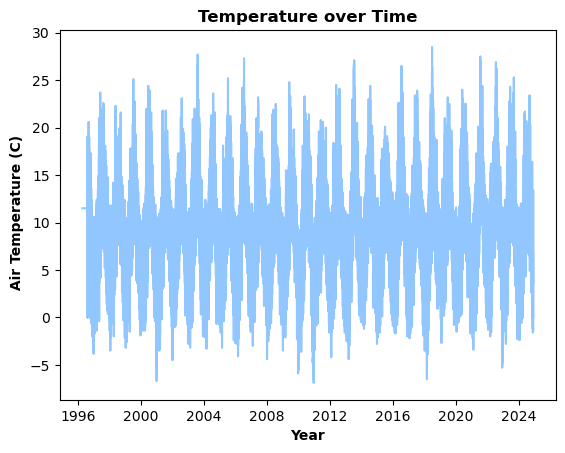

In [361]:
plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Temperature over Time', weight='bold')

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel(' Air Temperature (C)', weight ='bold')

# Generate plot
ax.plot(df['temp'])

In [362]:
# Resample by month and count
monthly_counts = df.groupby('temp').resample('1ME').size().unstack(fill_value=0)

Plot the mean temperature each day

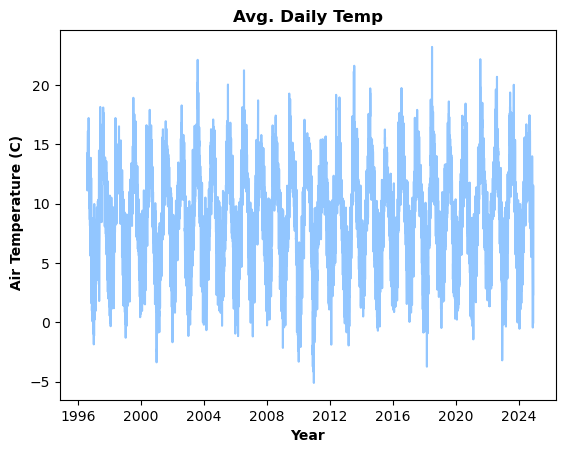

In [339]:
plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Avg. Daily Temp', weight='bold')

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel(' Air Temperature (C)', weight ='bold')

# Generate plot
ax.plot(df['temp'].resample("d").mean())

In [363]:
# Resample our time intervals to montly: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.resample.Resampler.size.html#pandas.core.resample.Resampler.size

print (df['temp'].resample("1ME").size())



date
1996-04-30      1
1996-05-31      0
1996-06-30      0
1996-07-31     16
1996-08-31    744
             ... 
2024-08-31    744
2024-09-30    720
2024-10-31    744
2024-11-30    720
2024-12-31      1
Freq: ME, Name: temp, Length: 345, dtype: int64


In [364]:
df['temp'].resample("1ME").mean()

date
1996-04-30    11.500000
1996-05-31          NaN
1996-06-30          NaN
1996-07-31    12.650000
1996-08-31    12.946909
                ...    
2024-08-31    13.233333
2024-09-30    11.741389
2024-10-31     9.966263
2024-11-30     7.449722
2024-12-31     0.000000
Freq: ME, Name: temp, Length: 345, dtype: float64

Plot the mean temperature for each month

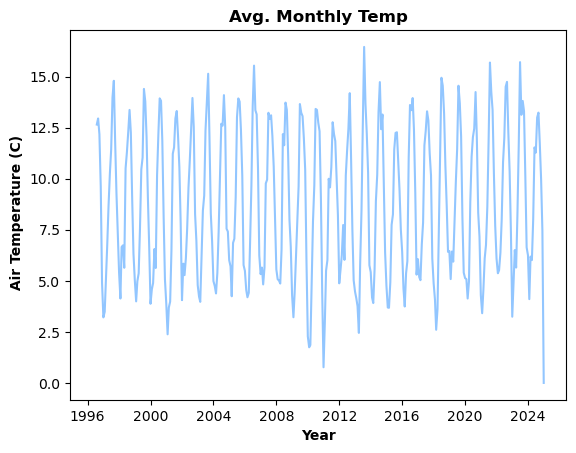

In [365]:
plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Avg. Monthly Temp', weight='bold')

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel(' Air Temperature (C)', weight ='bold')

# Generate plot
ax.plot(df['temp'].resample("1ME").mean())

Plot:

The Windspeed (there is data missing from this column)\
The rolling windspeed (say over 24 hours)\
The max windspeed for each day\
The monthly mean of the daily max windspeeds (yer I am being nasty here)

In [393]:
ds_wdsp = df['wdsp'].dropna().astype(int)
ds_wdsp

date
1996-04-10 14:00:00     0
1996-07-31 08:00:00     0
1996-07-31 09:00:00     0
1996-07-31 10:00:00     0
1996-07-31 11:00:00     0
                       ..
2024-11-30 20:00:00    17
2024-11-30 21:00:00    16
2024-11-30 22:00:00    15
2024-11-30 23:00:00    14
2024-12-01 00:00:00    12
Name: wdsp, Length: 248344, dtype: int32

In [394]:
# Replace 0 values with NaN and drop
ds_wdsp = ds_wdsp.replace(0,np.nan).dropna()
ds_wdsp

date
1996-08-01 01:00:00     6.0
1996-08-01 02:00:00     8.0
1996-08-01 03:00:00     9.0
1996-08-01 04:00:00     8.0
1996-08-01 05:00:00     8.0
                       ... 
2024-11-30 20:00:00    17.0
2024-11-30 21:00:00    16.0
2024-11-30 22:00:00    15.0
2024-11-30 23:00:00    14.0
2024-12-01 00:00:00    12.0
Name: wdsp, Length: 247934, dtype: float64

In [395]:
ds_wdsp.isna().sum()

0

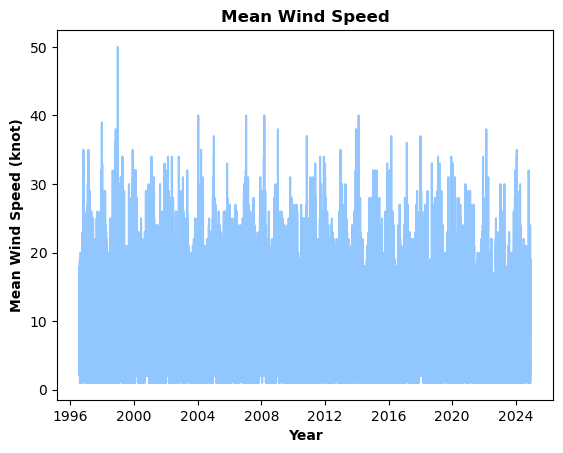

In [396]:
plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title('Mean Wind Speed', weight='bold')

# Axis labels.
ax.set_xlabel('Year', weight='bold')
ax.set_ylabel('Mean Wind Speed (knot)', weight ='bold')

# Generate plot
ax.plot(ds_wdsp)